In [75]:
import pandas as pd

sp500 = pd.read_csv("sp500_prepared.csv", parse_dates=["Date"])
news  = pd.read_csv("news_prepared.csv", parse_dates=["Date"])

In [76]:
sp500.head()

,Date,Open,High,Low,Close,Volume,abs_return,volatility,volatility_next_day,abs_return_next_day
0,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,3.991400e+09,0.014715,17.309937,6.969971,0.003408
1,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,2.491020e+09,0.003408,6.969971,5.239990,0.001259
2,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,4.972660e+09,0.001259,5.239990,11.140015,0.004770
3,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,5.270680e+09,0.004770,11.140015,9.170044,0.003910
4,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,4.389590e+09,0.003910,9.170044,7.719971,0.000890


In [77]:
news.head()

,Headline,Date
0,Average P/E Ratio by Decade,2010-01-05
1,Top picks from top pros - Watching the cash fl...,2010-01-05
2,Berkshire Hathaway Pales Against 2009 Stock Ma...,2010-01-05
3,Why Can't We Let Too-Big-to-Fail Companies Fail?,2010-01-06
4,Five Stocks for the Long Term Investor,2010-01-07


In [78]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [79]:
sid = SentimentIntensityAnalyzer()

In [80]:
def get_vader_sentiment(text):
    return sid.polarity_scores(text)["compound"]

news["sentiment"] = news["Headline"].apply(get_vader_sentiment)

In [81]:
news.sample(5)


,Headline,Date,sentiment
8389,"Stock Market News for Oct 12, 2020",2020-10-12,0.0000
6149,What the Correlation Between Crude Oil and the...,2018-11-21,-0.5719
3733,Treasure trove of Apollo moon photos released,2015-10-07,0.2960
10348,"S&P 500 earnings, Feb. 28-March 18: 19 compani...",2022-02-25,0.0000
10386,"Stock Market News for Mar 7, 2022",2022-03-07,0.0000


In [82]:
daily_news = (news
              .groupby("Date")
              .agg(
                  daily_mean_sentiment=("sentiment", "mean"),
                  news_volume=("Headline", "count"))
              .reset_index())

In [83]:
daily_news.head()

,Date,daily_mean_sentiment,news_volume
0,2010-01-05,0.127267,3
1,2010-01-06,-0.542300,1
2,2010-01-07,0.000000,1
3,2010-01-11,-0.177900,1
4,2010-01-13,-0.200950,2


In [84]:
daily_news.describe()

,Date,daily_mean_sentiment,news_volume
count,3268,3268.000000,3268.000000
mean,2017-04-23 10:22:37.160342784,0.028831,5.223990
min,2010-01-05 00:00:00,-0.812600,1.000000
25%,2013-12-09 18:00:00,-0.051450,2.000000
50%,2017-05-03 12:00:00,0.001621,4.000000
75%,2020-09-17 06:00:00,0.131294,6.000000
max,2023-12-29 00:00:00,0.788400,55.000000
std,NaN,0.191882,5.242046


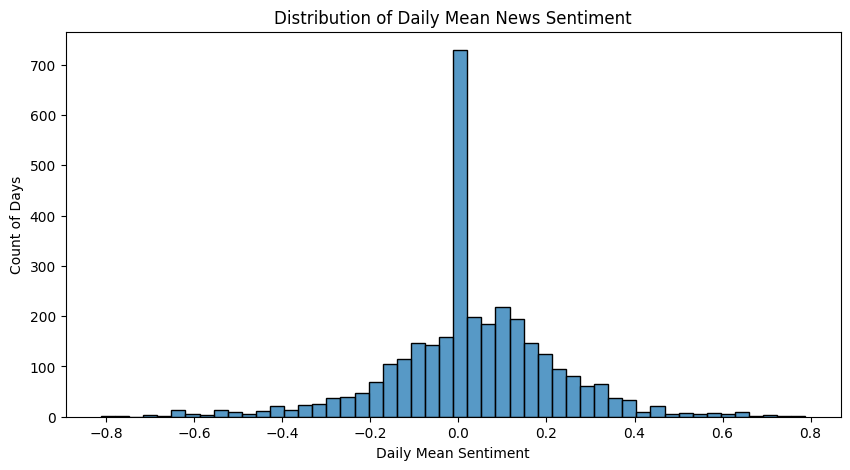

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(daily_news["daily_mean_sentiment"], bins=50)
plt.title("Distribution of Daily Mean News Sentiment")
plt.xlabel("Daily Mean Sentiment")
plt.ylabel("Count of Days")
plt.show()

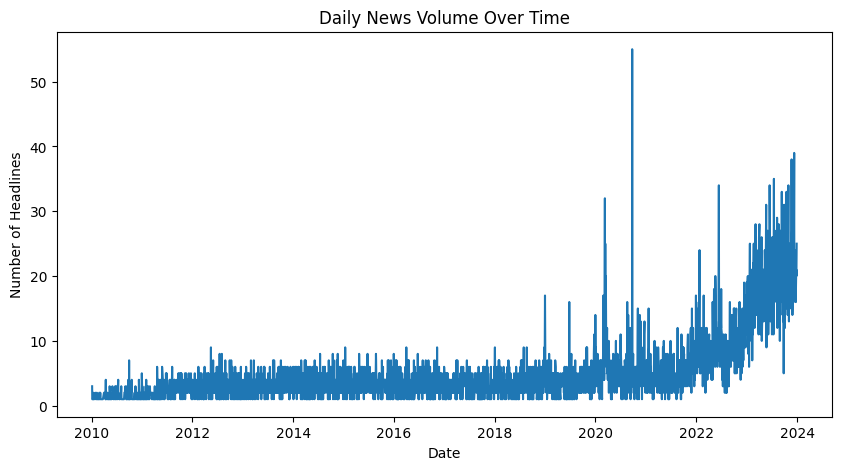

In [86]:
plt.figure(figsize=(10,5))
plt.plot(daily_news["Date"], daily_news["news_volume"])
plt.title("Daily News Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Headlines")
plt.show()

In [87]:
from google.colab import files

daily_news.to_csv("daily_news_sentiment.csv", index=False)
files.download("daily_news_sentiment.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>